https://data.mendeley.com/datasets/wj9rwkp9c2/1  Rashid, Ahlam (2020), “Diabetes Dataset”, Mendeley Data, V1, doi: 10.17632/wj9rwkp9c2.1

In [1]:
!wget https://data.mendeley.com/public-files/datasets/wj9rwkp9c2/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_downloaded

--2025-03-04 06:22:19--  https://data.mendeley.com/public-files/datasets/wj9rwkp9c2/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/e205d80e-2bc6-49ed-bfcc-4215b6b516fd [following]
--2025-03-04 06:22:20--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/e205d80e-2bc6-49ed-bfcc-4215b6b516fd
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.65.71, 52.92.16.50, 52.92.35.50, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.65.71|:443... conn

In [2]:
!pip install shap

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('/content/file_downloaded')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [6]:
df['ID'].nunique()

800

In [7]:
df['CLASS'].nunique()

5

In [8]:
df['CLASS'].value_counts()

,count
CLASS,
Y,840
N,102
P,53
Y,4
N,1



Y= Yes, N = No, P = Prediabetes.
Expected 3 Classes, Got 5.

In [9]:
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

There are spaces in front of Y and N. Let's strip those.

In [10]:
df['CLASS'] = df['CLASS'].str.replace(' ', '')
df['CLASS'].value_counts()

,count
CLASS,
Y,844
N,103
P,53


In [11]:
df['Gender'].nunique()

3

In [12]:
df['Gender'].value_counts()

,count
Gender,
M,565
F,434
f,1


In [13]:
df['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [14]:
df['Gender'] = df['Gender'].apply(str.upper)
df['Gender'].value_counts()

,count
Gender,
M,565
F,435


<Axes: xlabel='Gender'>

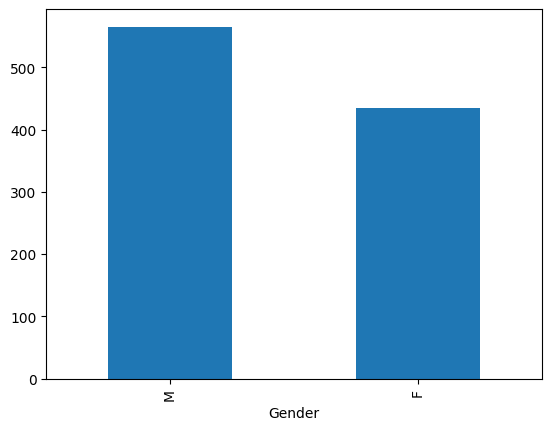

In [15]:
df['Gender'].value_counts().plot(kind = 'bar')

In [16]:
df['AGE'].nunique()

50

### Feature Engineering:
Create Age Range buckets to represent general healthcare reporting formats

In [17]:
age_range_buckets = ["[{0} - {1})".format(age, age + 10) for age in range(20, 100, 10)]
age_range_buckets

['[20 - 30)',
 '[30 - 40)',
 '[40 - 50)',
 '[50 - 60)',
 '[60 - 70)',
 '[70 - 80)',
 '[80 - 90)',
 '[90 - 100)']

In [18]:
df['age_range'] = pd.cut(x=df['AGE'], bins=8, labels=age_range_buckets)
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,[20 - 30)
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,[30 - 40)


In [19]:
df['age_range'].value_counts()

,count
age_range,
[60 - 70),476
[70 - 80),274
[50 - 60),79
[40 - 50),58
[30 - 40),54
[80 - 90),36
[90 - 100),19
[20 - 30),4


In [20]:
# Select only numeric columns for correlation calculation
#correlation_values = df.corr()
import numpy as np
correlation_values = df.select_dtypes(include=np.number).corr()

In [21]:
correlation_values

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
ID,1.000000,0.064920,-0.065980,-0.094434,-0.102457,-0.007571,0.044390,-0.055908,0.026231,-0.064305,0.146142,0.049409
No_Pation,0.064920,1.000000,-0.088006,-0.019160,0.000692,-0.032057,-0.030171,-0.039885,-0.013357,-0.003171,0.113754,0.017719
AGE,-0.065980,-0.088006,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956
Urea,-0.094434,-0.019160,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618
Cr,-0.102457,0.000692,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746
HbA1c,-0.007571,-0.032057,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350
Chol,0.044390,-0.030171,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678
TG,-0.055908,-0.039885,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757
HDL,0.026231,-0.013357,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409
LDL,-0.064305,-0.003171,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322


<Axes: >

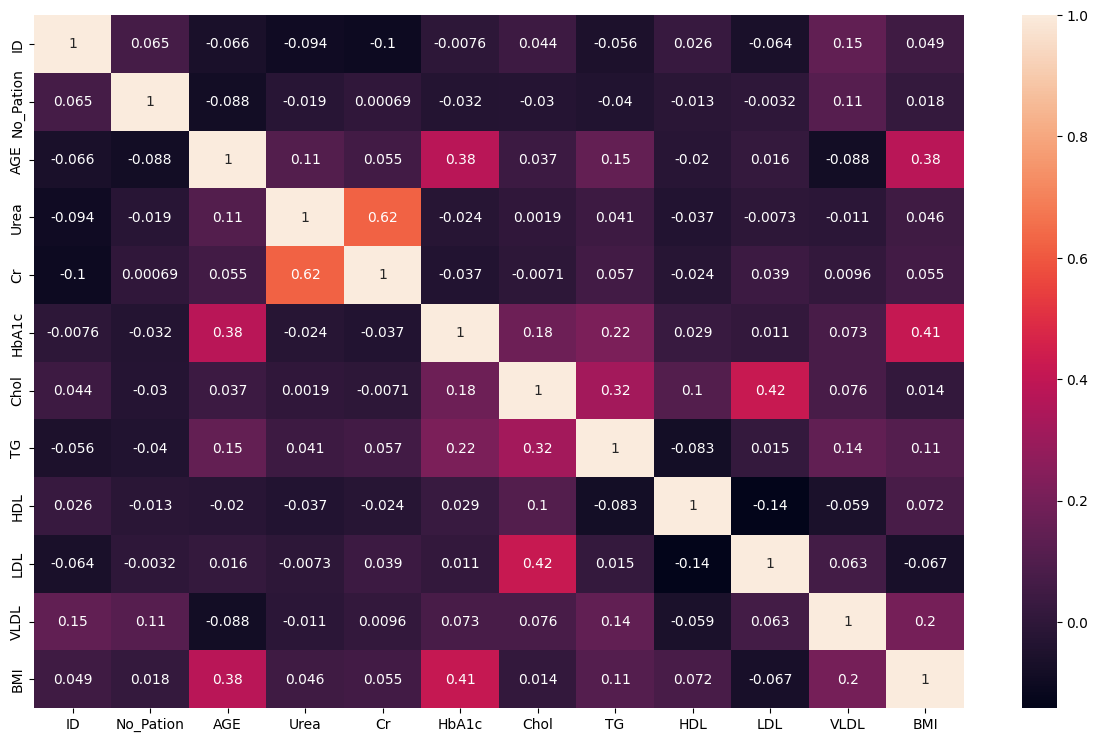

In [22]:
plt.figure(figsize=(15,9))
sns.heatmap(correlation_values,annot = True)

In [23]:
# No_Pation nuninique. Number of Partition is most likely an ID

df['No_Pation'].nunique()

961

In [24]:
df2 = df.drop(['ID','No_Pation','AGE'], axis=1) # since we have age range
df2.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
1,M,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,[20 - 30)
2,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
3,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
4,M,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,[30 - 40)


## Train Test Split

You should split your data into training and testing sets before applying any transformations, including scaling or standardization.

Reasoning:

Preventing Data Leakage: If you transform the entire dataset before splitting, information from the test set will influence the transformation applied to the training set. This is called data leakage and can lead to overly optimistic model performance estimates. The model might appear to perform well on the test set, but it's actually because it has already "seen" some information about the test set during the transformation process.

Real-World Simulation: When you deploy your model in the real world, it will encounter new, unseen data. By splitting before transformation, you simulate this scenario more accurately. The model is trained on a portion of the data and evaluated on a completely separate portion that it hasn't seen before, including during the transformation process

In [25]:
# Split data into features (X) and target (y)
X = df2.drop('CLASS', axis=1)
y = df2['CLASS']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 11)
X_test shape: (200, 11)
y_train shape: (800,)
y_test shape: (200,)


## Encode Categorical Variables

Encoding Types

Label Encoding: Assigning a unique integer to each category in a categorical feature. Recommended for ordinal features (features with a natural order) or when the number of categories is large and one-hot encoding would create too many features.
One-Hot Encoding: Creating a new binary feature for each category in a categorical feature. Recommended for nominal features (features with no natural order) and when the number of categories is small.
When to Use

Label Encoding: Use when the order of the categories matters, or when dealing with high-cardinality categorical features.
One-Hot Encoding: Use when the order of the categories doesn't matter, or when the number of unique categories is low.

In [26]:

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Gender' column
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Gender'] = le.transform(X_test['Gender'])

# Fit and transform the 'age_range' column
X_train['age_range'] = le.fit_transform(X_train['age_range'])
X_test['age_range'] = le.transform(X_test['age_range'])

# Encode CLASS- y_train
# Fit and transform the target variable for the training set
y_train = le.fit_transform(y_train)

# Transform the target variable for the test set using the same encoder
y_test = le.transform(y_test)

In [27]:
X_train['Gender'].value_counts()

,count
Gender,
1,456
0,344


In [28]:
X_train['age_range'].value_counts()

,count
age_range,
4,379
5,223
3,67
2,44
1,44
6,28
7,12
0,3


In [29]:
X_train.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,age_range
29,0,4.3,49,4.0,5.6,1.4,1.4,3.6,0.6,22.0,3
535,1,2.7,38,8.8,4.8,1.3,1.7,1.6,2.0,26.0,4
695,1,2.9,35,11.5,4.9,2.1,2.3,1.8,0.8,33.0,6
557,1,3.2,49,6.7,4.6,1.2,1.3,2.8,0.5,30.2,4
836,0,5.9,74,12.4,5.5,1.3,1.6,1.7,1.9,27.0,4


In [30]:
scaler = MinMaxScaler()

In [31]:
columns_to_scale = ['Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
columns_scaled = ['Urea_scaled','Cr_scaled','HbA1c_scaled','Chol_scaled','TG_scaled','HDL_scaled','LDL_scaled','VLDL_scaled','BMI_scaled']
scale_values = X_train[columns_to_scale].values
scaled_array = scaler.fit_transform(scale_values)
X_train_scaled = pd.DataFrame(scaled_array, columns=columns_scaled)
X_train_scaled.head()

,Urea_scaled,Cr_scaled,HbA1c_scaled,Chol_scaled,TG_scaled,HDL_scaled,LDL_scaled,VLDL_scaled,BMI_scaled
0,0.161702,0.054156,0.205298,0.565657,0.081481,0.123711,0.329787,0.014925,0.104348
1,0.093617,0.040302,0.523179,0.484848,0.074074,0.154639,0.117021,0.056716,0.243478
2,0.102128,0.036524,0.701987,0.494949,0.133333,0.216495,0.138298,0.020896,0.486957
3,0.114894,0.054156,0.384106,0.464646,0.066667,0.113402,0.244681,0.011940,0.389565
4,0.229787,0.085642,0.761589,0.555556,0.074074,0.144330,0.127660,0.053731,0.278261


## Instantiate Models

In [32]:
models = []
models.append(('LR', LogisticRegression(solver ='lbfgs',multi_class='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('XGB',XGBClassifier()))

In [33]:
results = []
names = []

## Cross Validation

Cross-validation is a resampling technique used to evaluate the performance of machine learning models on unseen data. This is done by partitioning the data into subsets, training the model on some of the data, and then testing it on the remaining data.

Why is Cross-Validation Important?

Prevent Overfitting: Models can sometimes perform very well on the data they were trained on but poorly on new data (overfitting). Cross-validation helps to assess how well a model generalizes to unseen data and reduces overfitting.
Model Selection: You can use cross-validation to compare different machine learning algorithms and choose the one that performs the best for your dataset.
Hyperparameter Tuning: Cross-validation is essential for finding the optimal values for hyperparameters (settings that control how a model learns) to further improve model performance.

In [34]:
from sklearn.model_selection import KFold, cross_val_score # Import necessary classes

In [35]:

# Define the number of folds for k-fold cross-validation
num_folds = 5

# Iterate through the models
for name, model in models:
  # Create a KFold object
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

  # Perform cross-validation
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

  # Store the results
  results.append(cv_results)
  names.append(name)

  # Print the mean and standard deviation of the accuracy scores
  print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

LR: 0.8513 (0.0139)
KNN: 0.8750 (0.0213)
NB: 0.9363 (0.0232)
SVC: 0.8387 (0.0183)
RFC: 0.9825 (0.0108)
DTR: 0.9750 (0.0040)
XGB: 0.9850 (0.0085)


## Make Predictions with best performing Model

In [36]:
# Since XGB is the best performing model based on the cross-validation results
best_model = XGBClassifier()

# Train the best model on the entire training dataset
best_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = best_model.predict(X_test)

In [37]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [38]:
# Evaluate the performance of the best model on the test dataset
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model on the test dataset: {accuracy:.4f}")

Accuracy of the best model on the test dataset: 0.9850


In [39]:
# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)




              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.86      1.00      0.92         6
           2       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.93      0.98      0.96       200
weighted avg       0.99      0.98      0.99       200

Confusion Matrix:
[[ 20   0   1]
 [  0   6   0]
 [  1   1 171]]


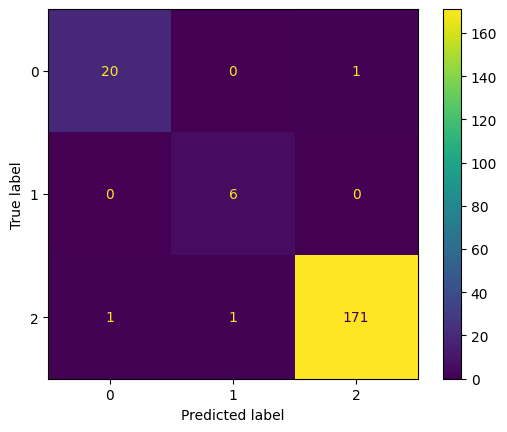

In [40]:
# You can also visualize the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Interview Readiness

Review the healthcare data set

Carry out EDA in your own notebook

What insights did you derive from the EDA

Carry out ML Modelling

What Machine learning problems were solved

Evaluate your model.

What was your best performing model

Upload your notebook to Moodle.

Create a Github Repo for this Project- create a README file

Upload a link to your repo to Moodle

Link to Github as Markdown at the top line of Notebook.








**----> Interview Readiness**

## Reviewing the healthcare data set

In [41]:
# Interview Readiness
# Reviewing the healthcare data set

# loading the dataset
df = pd.read_csv('Dataset of Diabetes .csv')
df.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [42]:
# Checking the shape of the dataset
df.shape

(1000, 14)

In [43]:
# Displaying basic info:
df.info()
print("Basic Statistics")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB
Basic Statistics


,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [44]:
# Checking for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [45]:
# Checking duplicates
print("Duplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


--->**Dataset Overview:**
1. The dataset contains 1,000 entries and 14 columns.
2. The target variable appears to be "CLASS", which categorizes patients (likely as diabetic or non-diabetic).
3. Key features include age, gender, BMI, cholesterol levels, and blood test results.
4. There are no missing values in the dataset.
5. There is not any duplicate value in the dataset
6. The datatype of each row is in correct format.


## Exploratory Data Analysis (EDA)

In [46]:
# Count the unique values in 'CLASS' column
class_counts = df['CLASS'].value_counts()
class_counts

,count
CLASS,
Y,840
N,102
P,53
Y,4
N,1


<ipython-input-47-bdb3ddfe0424>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['CLASS'], palette='viridis')


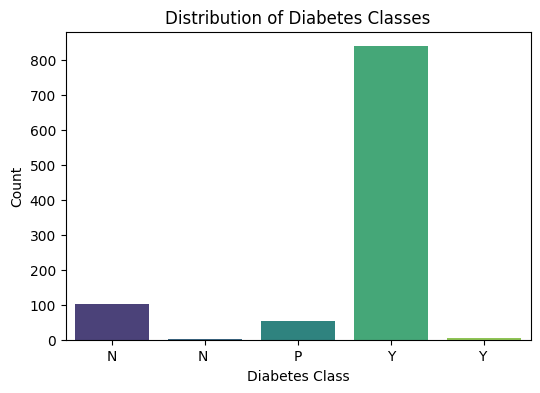

In [47]:
# Carrying out EDA:
# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['CLASS'], palette='viridis')
plt.xlabel("Diabetes Class")
plt.ylabel("Count")
plt.title("Distribution of Diabetes Classes")
plt.show()

---**-> Observation:**

The dataset is imbalanced, with the majority of individuals in the dataset having "Y" (Yes, indicating they have diabetes), followed by "N" (No, indicating they do not have diabetes), and a smaller proportion having "P" (Prediabetes).


In [48]:
# Insights from EDA
print("Summary Statistics:\n", df.describe())


Summary Statistics:
                 ID     No_Pation          AGE         Urea           Cr  \
count  1000.000000  1.000000e+03  1000.000000  1000.000000  1000.000000   
mean    340.500000  2.705514e+05    53.528000     5.124743    68.943000   
std     240.397673  3.380758e+06     8.799241     2.935165    59.984747   
min       1.000000  1.230000e+02    20.000000     0.500000     6.000000   
25%     125.750000  2.406375e+04    51.000000     3.700000    48.000000   
50%     300.500000  3.439550e+04    55.000000     4.600000    60.000000   
75%     550.250000  4.538425e+04    59.000000     5.700000    73.000000   
max     800.000000  7.543566e+07    79.000000    38.900000   800.000000   

             HbA1c         Chol           TG          HDL          LDL  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      8.281160     4.862820     2.349610     1.204750     2.609790   
std       2.534003     1.301738     1.401176     0.660414     1.115102   
min    

**Univariate Analysis:**

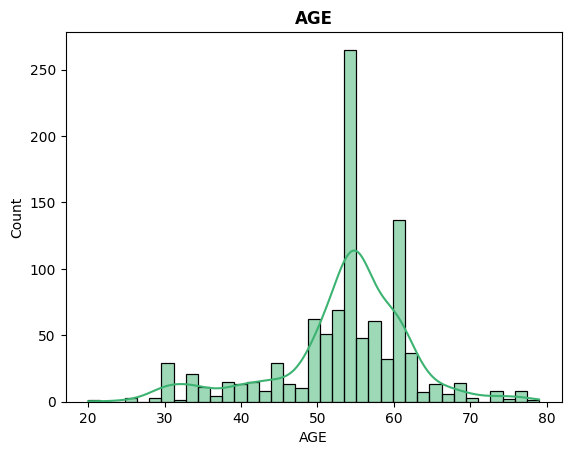

In [51]:
sns.histplot(df['AGE'], kde=True, color='mediumseagreen')
plt.title('AGE', fontweight='bold')
plt.show()

**----> Observation from histogram of Age Column**

The distribution of age appears to be slightly right-skewed, indicating that there are more younger individuals in the dataset compared to older individuals. The kernel density estimate (KDE) curve further emphasizes this trend. The majority of patients fall within the age range of 40-60 years old. This suggests the dataset might include a higher representation of middle-aged individuals.

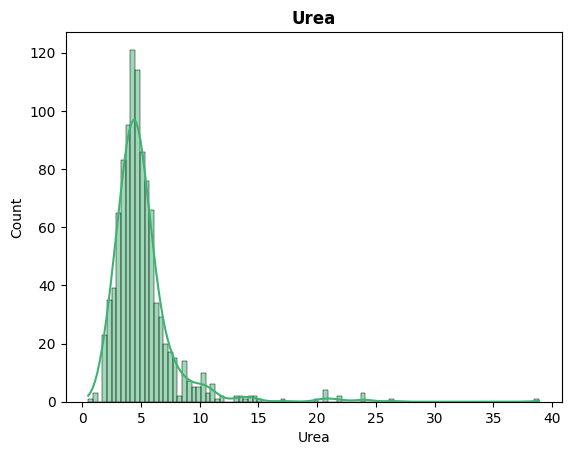

In [52]:
sns.histplot(df['Urea'], kde=True, color='mediumseagreen')
plt.title('Urea', fontweight='bold')
plt.show()

**---> Observation from histogram of Urea Column**

The distribution of Urea levels in the dataset appears to be right-skewed, with a majority of values concentrated towards the lower end (around 5-20) and a tail extending towards higher values. This indicates that most individuals in the dataset have relatively normal Urea levels, while a smaller proportion exhibit elevated levels. The KDE curve further highlights this skewness. Potential outliers with significantly high Urea values might warrant further investigation.

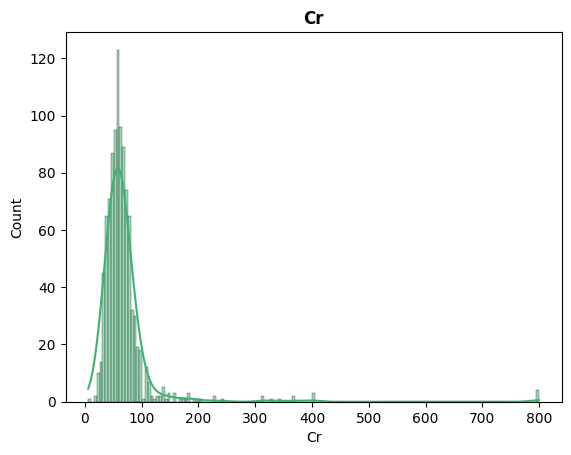

In [53]:
sns.histplot(df['Cr'], kde=True, color='mediumseagreen')
plt.title('Cr', fontweight='bold')
plt.show()

**---> Observation from histogram of Cr column:**

The distribution of Creatinine (Cr) levels in the dataset appears to be right-skewed with a majority of values concentrated around 0.5 to 1.0. This indicates that most individuals in the dataset have Cr levels within a typical range. However, there's a noticeable tail extending towards higher Cr values, suggesting the presence of some individuals with elevated levels, which could be indicative of impaired kidney function or other underlying health conditions. The KDE curve further emphasizes this right-skewed pattern. Further investigation might be warranted to explore the clinical significance of these higher Cr values.

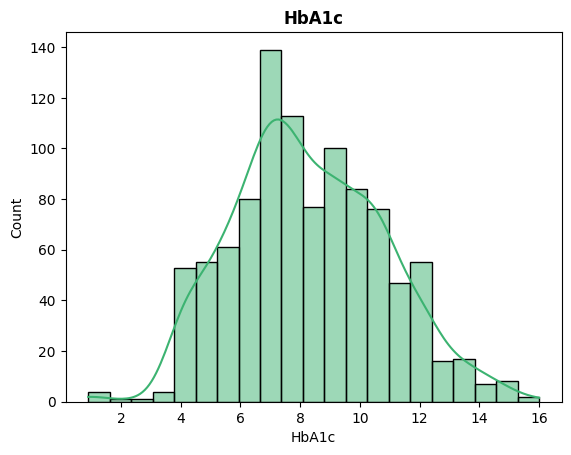

In [54]:
sns.histplot(df['HbA1c'], kde=True, color='mediumseagreen')
plt.title('HbA1c', fontweight='bold')
plt.show()

**---> Observation from histogram of HbA1c column:**

The distribution of HbA1c levels in the dataset appears to be bimodal, with two distinct peaks. One peak is observed around the normal range (5-6%), and a second, broader peak is seen around higher values (7-10%). This bimodal pattern suggests the presence of two distinct groups within the dataset, possibly representing individuals with and without diabetes or varying levels of glycemic control. The KDE curve further illustrates this bimodal distribution, emphasizing the two distinct peaks.

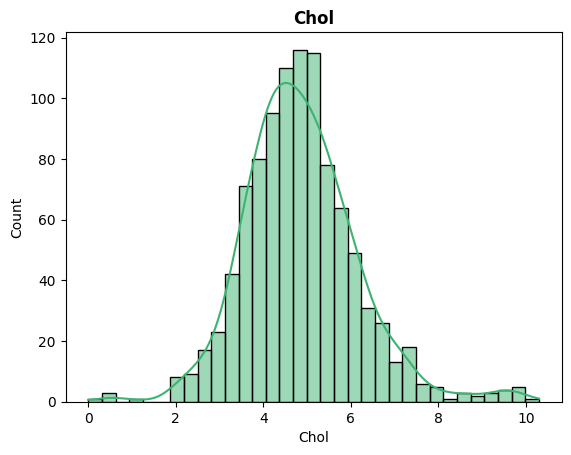

In [55]:
sns.histplot(df['Chol'], kde=True, color='mediumseagreen')
plt.title('Chol', fontweight='bold')
plt.show()

**----> Observation from histogram of Chol Column:**

The distribution of Cholesterol (Chol) levels in the dataset appears to be slightly right-skewed, with the majority of values falling within the range of approximately 3 to 6. This suggests that most individuals in the dataset have cholesterol levels within a relatively normal range. However, there is a noticeable tail extending towards higher values, indicating the presence of some individuals with elevated cholesterol levels, which could potentially be a risk factor for cardiovascular diseases. The KDE curve further emphasizes this right-skewed pattern and the concentration of data points around the lower to moderate cholesterol values. Further investigation may be warranted to explore the clinical significance of these higher cholesterol values and their potential implications for health outcomes.

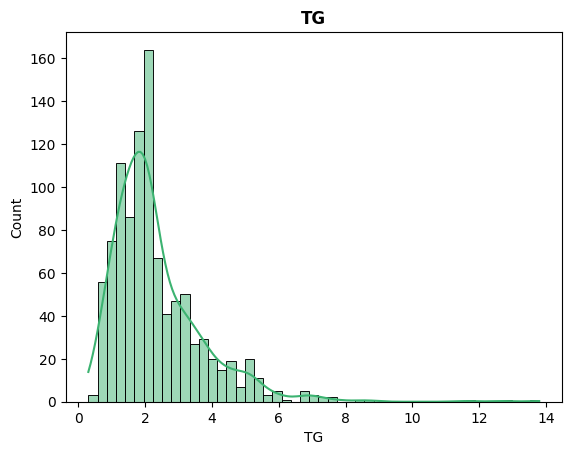

In [56]:
sns.histplot(df['TG'], kde=True, color='mediumseagreen')
plt.title('TG', fontweight='bold')
plt.show()

**----> Observation from histogram of TG column**

The distribution of Triglycerides (TG) levels in the dataset, as shown by the histogram, appears to be heavily right-skewed. This indicates that the majority of individuals in the dataset have relatively lower TG levels, while a smaller proportion exhibits significantly higher values.



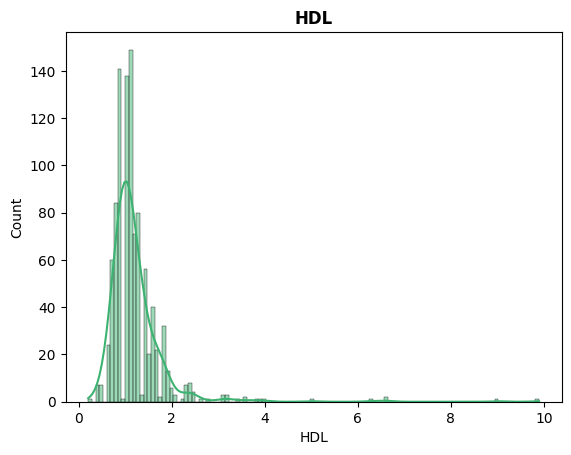

In [57]:
sns.histplot(df['HDL'], kde=True, color='mediumseagreen')
plt.title('HDL', fontweight='bold')
plt.show()

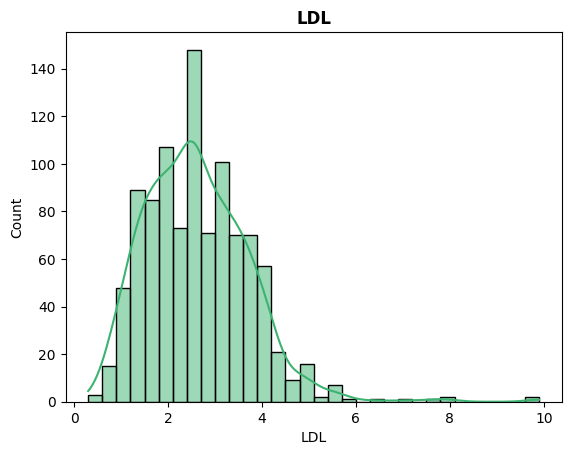

In [58]:
sns.histplot(df['LDL'], kde=True, color='mediumseagreen')
plt.title('LDL', fontweight='bold')
plt.show()


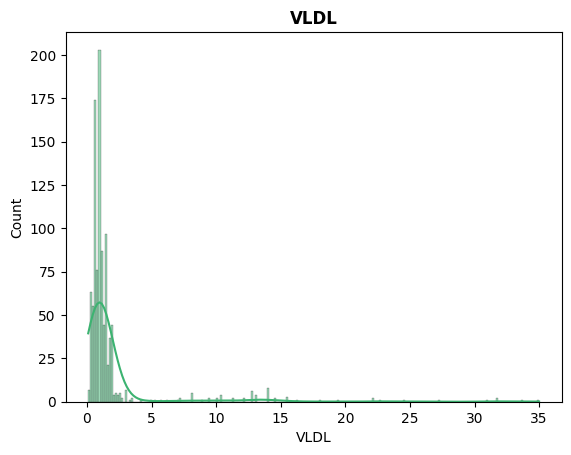

In [59]:
sns.histplot(df['VLDL'], kde=True, color='mediumseagreen')
plt.title('VLDL', fontweight='bold')
plt.show()

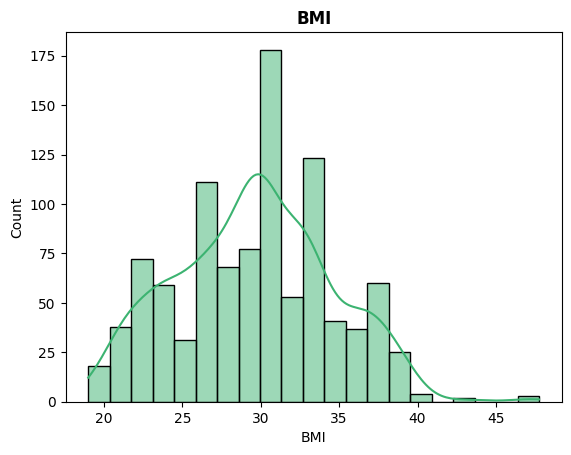

In [61]:
sns.histplot(df['BMI'], kde=True, color='mediumseagreen')
plt.title('BMI', fontweight='bold')
plt.show()

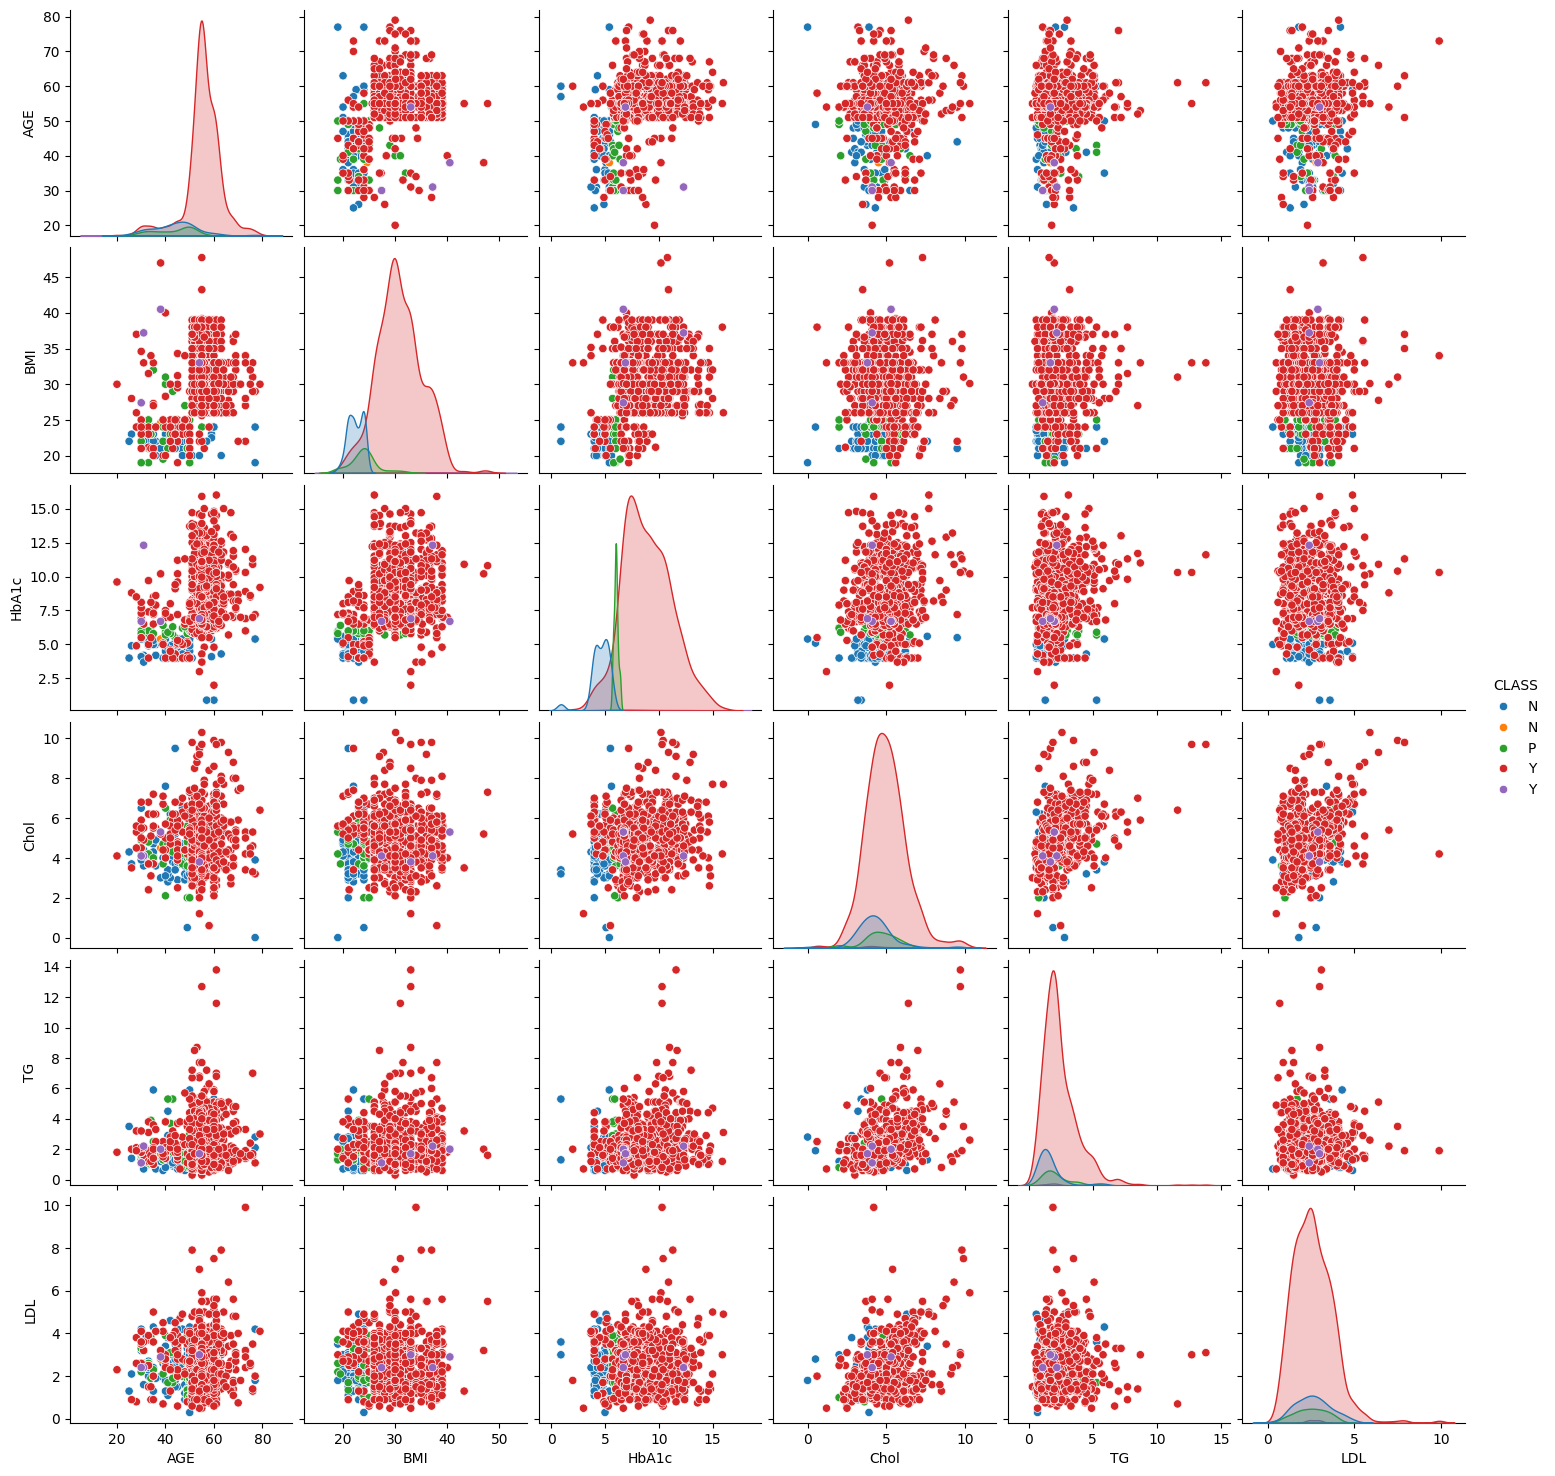

In [62]:
# Pairplot of selected features
selected_features = ["AGE", "BMI", "HbA1c", "Chol", "TG", "LDL", "CLASS"]
sns.pairplot(df[selected_features], hue="CLASS", diag_kind="kde")
plt.show()


**----> Observation from Pairplot**

1. The pairplot reveals that HbA1c and BMI are strong indicators of diabetes, with higher values being associated with a greater likelihood of having the disease. Age and cholesterol levels also show some association, but their relationships with diabetes might be more complex.

Observations from the pairplot include a positive correlation between age and BMI, a clear trend of higher HbA1c levels in diabetic individuals, and a subtle association between higher cholesterol levels and diabetes

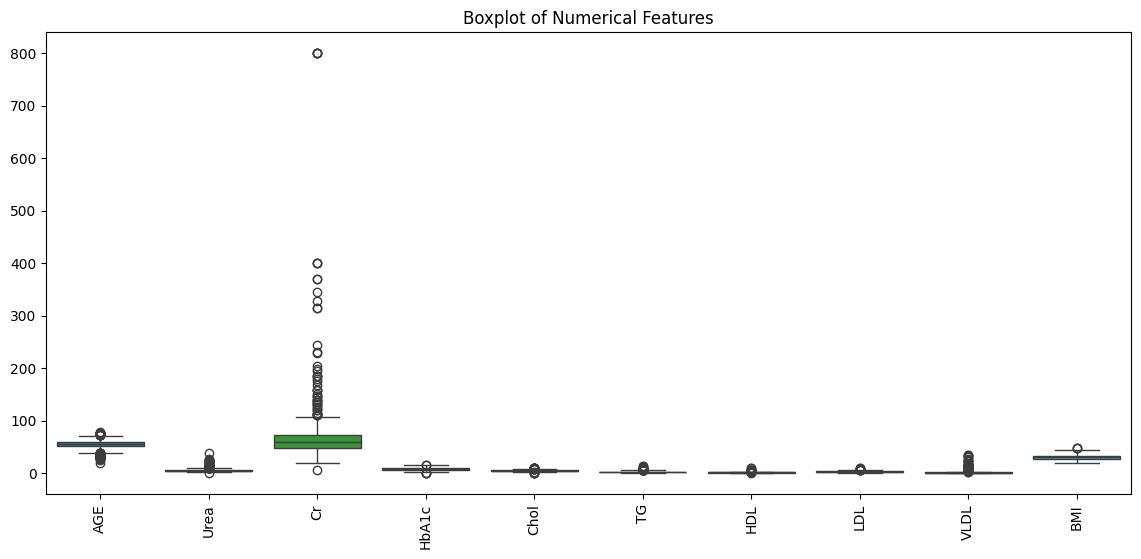

In [63]:
# Boxplot for numerical features
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.drop(columns=["ID", "No_Pation"]))
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()


**----> Observation from Boxplot**

**Outliers:** Notable outliers are present in features such as 'Urea', 'Cr', 'HbA1c', 'Chol', and 'TG', indicating individuals with potentially elevated levels of these health indicators. This warrants further investigation into these cases and their potential implications.

**Distribution and Skewness:** Features like 'Urea', 'Cr', and 'TG' exhibit right-skewed distributions, with most values concentrated towards the lower end and a few higher values extending the tail. This skewness should be considered during data preprocessing and model selection.

**Variability:** Features such as 'HbA1c', 'Chol', 'TG', and 'BMI' display wider interquartile ranges (IQRs), indicating greater variability in these health indicators among individuals in the dataset. This variability highlights the diversity within the population and its potential impact on health outcomes.

**Feature Relationships:** The boxplots suggest potential correlations between features like 'Urea' and 'Cr', which are commonly associated with kidney function. Further exploration of relationships between 'HbA1c' and other features like 'AGE', 'BMI', and lipid profiles is warranted.

**Lipid Profiles:** Comparing the boxplots of lipid-related features ('Chol', 'TG', 'HDL', 'LDL', and 'VLDL') provides insights into the overall lipid profile of individuals, highlighting potential cardiovascular health risks associated with elevated cholesterol and triglyceride levels.

**BMI Range:** The 'BMI' feature showcases a wide range of values, encompassing underweight, normal weight, overweight, and obese individuals. This diversity underscores the importance of considering BMI as a key indicator of body weight status and potential health risks.


The boxplot analysis provides valuable insights into the distribution, outliers, central tendency, and variability of the healthcare dataset's numerical features. These insights can guide further data exploration, preprocessing steps, and feature engineering for building robust machine-learning models. Specifically, addressing outliers, handling skewness, and considering feature relationships are crucial considerations for developing accurate and reliable predictive models for healthcare applications.

In [67]:
# Feature Engineering (Convert categorical variables to numeric)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['CLASS'] = le.fit_transform(df['CLASS'])


In [69]:
# Checking datatypes
df.dtypes

,0
ID,int64
No_Pation,int64
Gender,int64
AGE,int64
Urea,float64
Cr,int64
HbA1c,float64
Chol,float64
TG,float64
HDL,float64


In [70]:
# Defining Features and Target
X = df.drop(columns=["ID", "No_Pation", "CLASS"])
y = df["CLASS"]
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [71]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
# Normalizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
norm_col = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[norm_col])
df_scaled = pd.DataFrame(df_scaled, columns=norm_col)
df = pd.concat([df_scaled, df[['Gender', 'CLASS']]], axis=1)
df

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender,CLASS
0,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913,0,0
1,0.101695,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130,1,0
2,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913,0,0
3,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913,0,0
4,0.220339,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.864407,0.273438,0.114610,0.403974,0.728155,0.103704,0.103093,0.156250,0.014327,0.382609,1,3
996,0.186441,0.065104,0.068010,0.754967,0.398058,0.140741,0.051546,0.218750,0.438395,0.633043,1,4
997,0.169492,0.171875,0.094458,0.384106,0.398058,0.059259,0.103093,0.218750,0.229226,0.292174,1,4
998,0.305085,0.138021,0.066751,0.384106,0.514563,0.125926,0.144330,0.270833,0.398281,0.747826,1,4


In [75]:
# Carrying out ML Modelling
# Training a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [76]:
# Training a Gradient Boosting model'
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)


In [77]:
# Evaluating models
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_pred))

Random Forest Accuracy: 0.985
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           2       1.00      1.00      1.00         6
           3       0.99      0.99      0.99       172
           4       0.00      0.00      0.00         1

    accuracy                           0.98       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.98      0.98      0.98       200

Gradient Boosting Accuracy: 0.98
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           2       1.00      1.00      1.00         6
           3       0.98      0.99      0.99       172
           4       0.00      0.00      0.00         1

    accuracy                           0.98       200
   macro avg       0.73      0.72      0.73       200
weighted avg       0.97      0.98      0.9

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [78]:
# Determining best performing model
rf_acc = accuracy_score(y_test, rf_pred)
gb_acc = accuracy_score(y_test, gb_pred)
best_model = "Random Forest" if rf_acc > gb_acc else "Gradient Boosting"
print("Best Performing Model:", best_model)

Best Performing Model: Random Forest


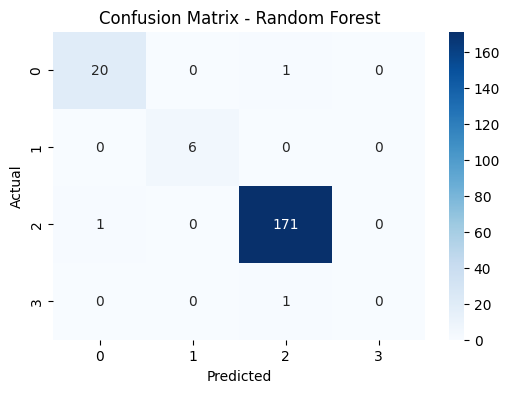

In [79]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

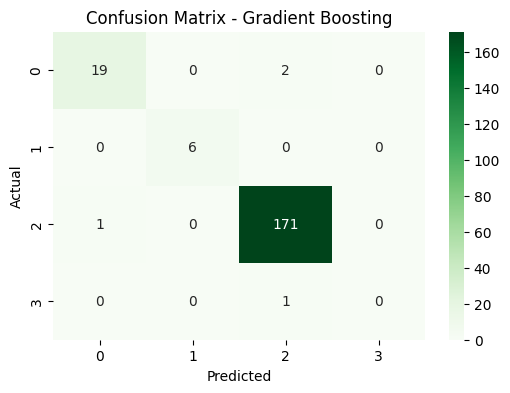

In [80]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

Github repository link: https://github.com/Simran80051/Diabetes_Dataset
